In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12

In [16]:
import xarray as xr

import xarray_sentinel

import os

In [3]:
# uncomment download the data
#! DHUS_USER=<user> DHUS_PASSWORD=<password> ./download_data.sh

In [4]:
product_path = (
    "data/S1B_IW_GRDH_1SDV_20211223T051122_20211223T051147_030148_039993_5371.SAFE"
)
swath_group = "IW"
swath_polarisation_group = "IW/VV"
measurement_group = "IW/VV"
measurement_block_slices = (slice(7000, 9000), slice(20000, 23000))
digital_number_max = 600

!ls -d {product_path}

ls: cannot access 'data/S1B_IW_GRDH_1SDV_20211223T051122_20211223T051147_030148_039993_5371.SAFE': No such file or directory


In [5]:
# xr.open_dataset(product_path, engine="sentinel-1")

In [6]:
# xr.open_dataset(product_path, engine="sentinel-1", group=swath_group)

In [7]:
# xr.open_dataset(product_path, engine="sentinel-1", group=swath_polarisation_group)

In [8]:
# measurement = xr.open_dataset(
#     product_path, engine="sentinel-1", group=measurement_group, chunks=2048
# )
# measurement

In [22]:
DATASET_URL = "https://objects.eodc.eu/e05ab01a9d56408d82ac32d69a5aae2a:202506-s01siwgrh/29/products/cpm_v256/S1C_IW_GRDH_1SDV_20250629T051050_20250629T051115_002993_006192_2985.zarr"
# os.environ["AWS_ENDPOINT_URL"] = "https://objectstore.eodc.eu:2222"
dt = xr.open_datatree(DATASET_URL, engine="zarr", chunks={})
measurement_block = dt["S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/measurements"].to_dataset()
measurement_block

<xarray.Dataset> Size: 888MB
Dimensions:       (azimuth_time: 16679, ground_range: 26612)
Coordinates:
  * azimuth_time  (azimuth_time) uint16 33kB 52568 44137 35707 ... 35334 26904
Dimensions without coordinates: ground_range
Data variables:
    grd           (azimuth_time, ground_range) uint16 888MB dask.array<chunksize=(5043, 26612), meta=np.ndarray>

ValueError: The input coordinate is not sorted in increasing order along axis 0. This can lead to unexpected results. Consider calling the `sortby` method on the input DataArray. To plot data with categorical axes, consider using the `heatmap` function from the `seaborn` statistical plotting library.

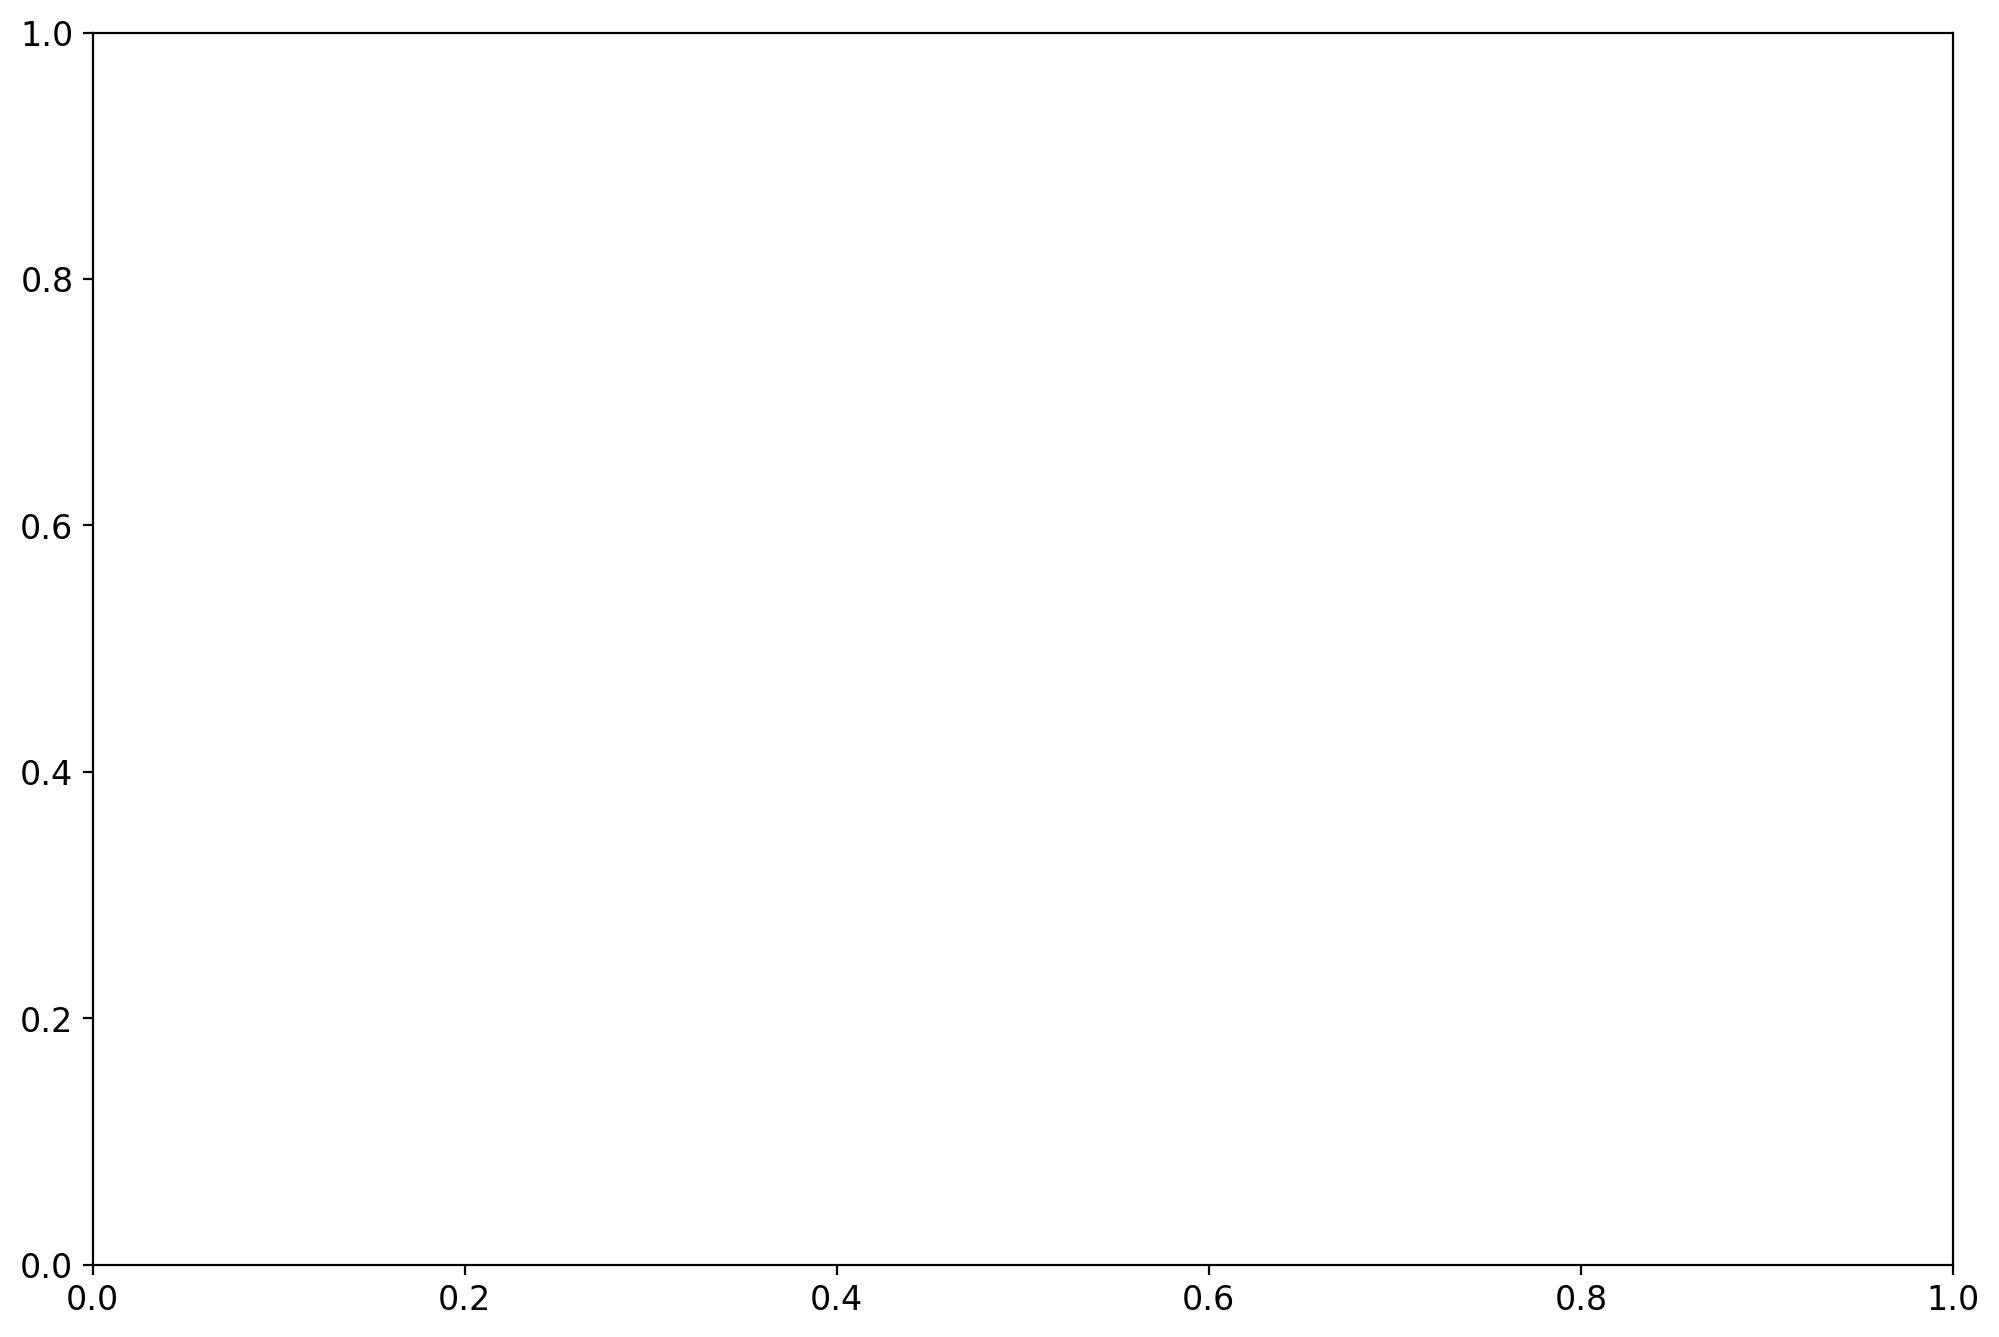

In [ ]:
dn = abs(measurement_block).isel(
    azimuth_time=slice(None, None, 10), ground_range=slice(None, None, 10)
).to_dataarray()
dn.plot(
    y="azimuth_time"
)

In [ ]:
gcp = xr.open_dataset(
    product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/gcp"
)
gcp

In [ ]:
gcp = dt["S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/gcp"].to_dataset()
gcp

<xarray.Dataset> Size: 13kB
Dimensions:           (azimuth_time: 210)
Coordinates:
  * azimuth_time      (azimuth_time) datetime64[ns] 2kB 2025-06-29T05:10:50.9...
    line              (azimuth_time) uint32 840B dask.array<chunksize=(210,), meta=np.ndarray>
Data variables:
    elevation_angle   (azimuth_time) float64 2kB dask.array<chunksize=(210,), meta=np.ndarray>
    height            (azimuth_time) float64 2kB dask.array<chunksize=(210,), meta=np.ndarray>
    incidence_angle   (azimuth_time) float64 2kB dask.array<chunksize=(210,), meta=np.ndarray>
    latitude          (azimuth_time) float64 2kB dask.array<chunksize=(210,), meta=np.ndarray>
    longitude         (azimuth_time) float64 2kB dask.array<chunksize=(210,), meta=np.ndarray>
    pixel             (azimuth_time) uint32 840B dask.array<chunksize=(210,), meta=np.ndarray>
    slant_range_time  (azimuth_time) float64 2kB dask.array<chunksize=(210,), meta=np.ndarray>

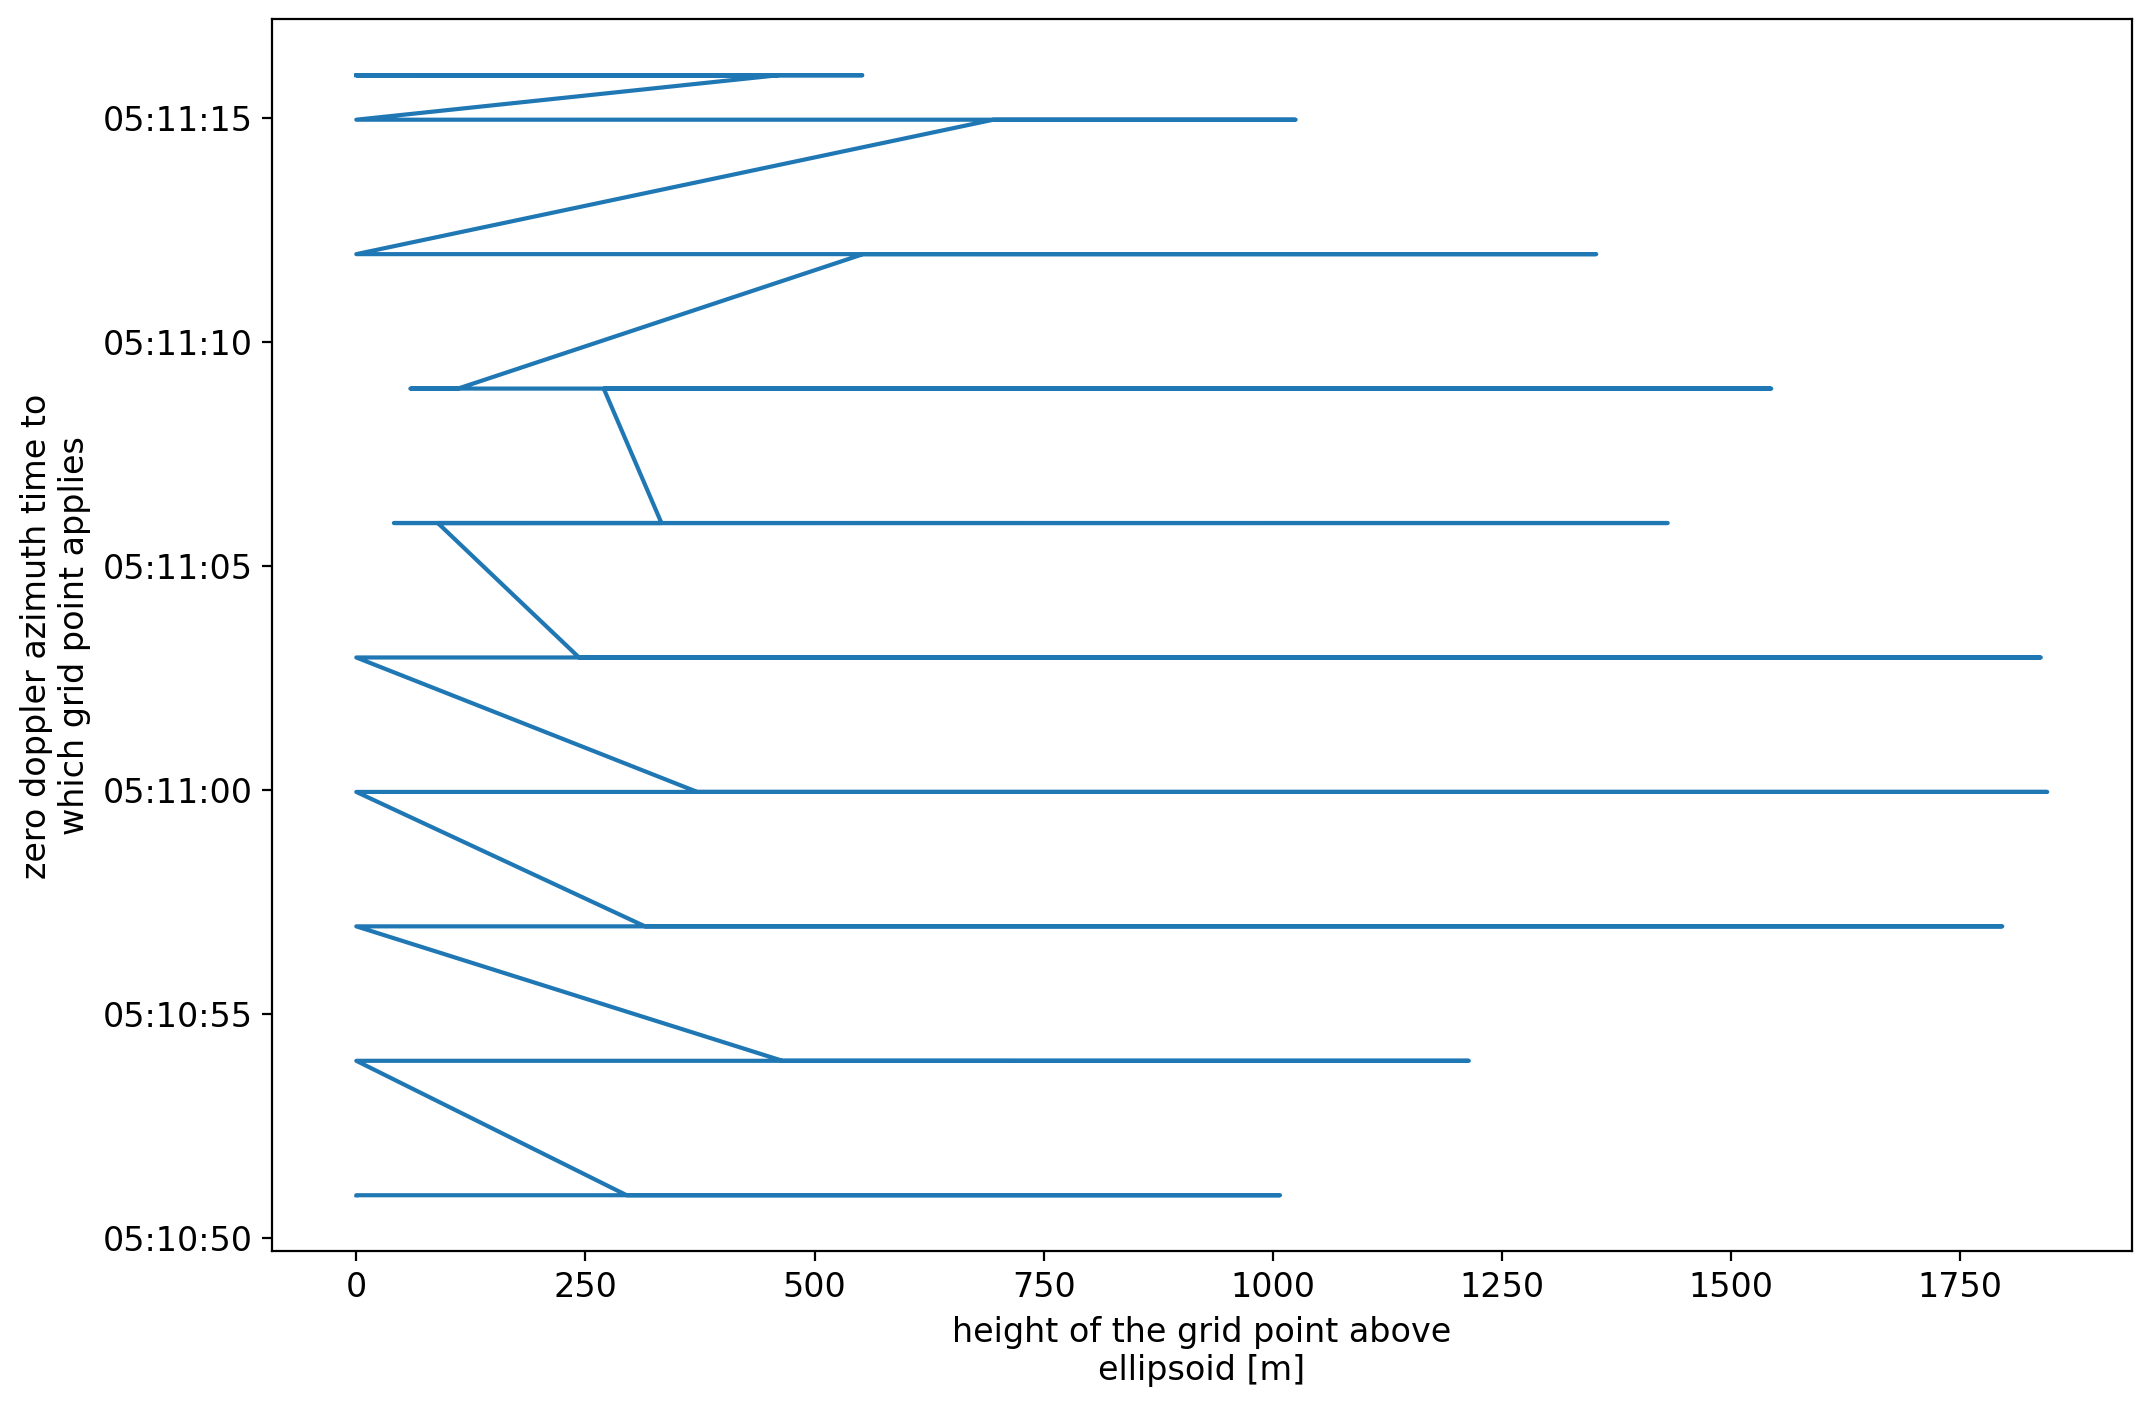

In [ ]:
_ = gcp.height.plot(y="azimuth_time")

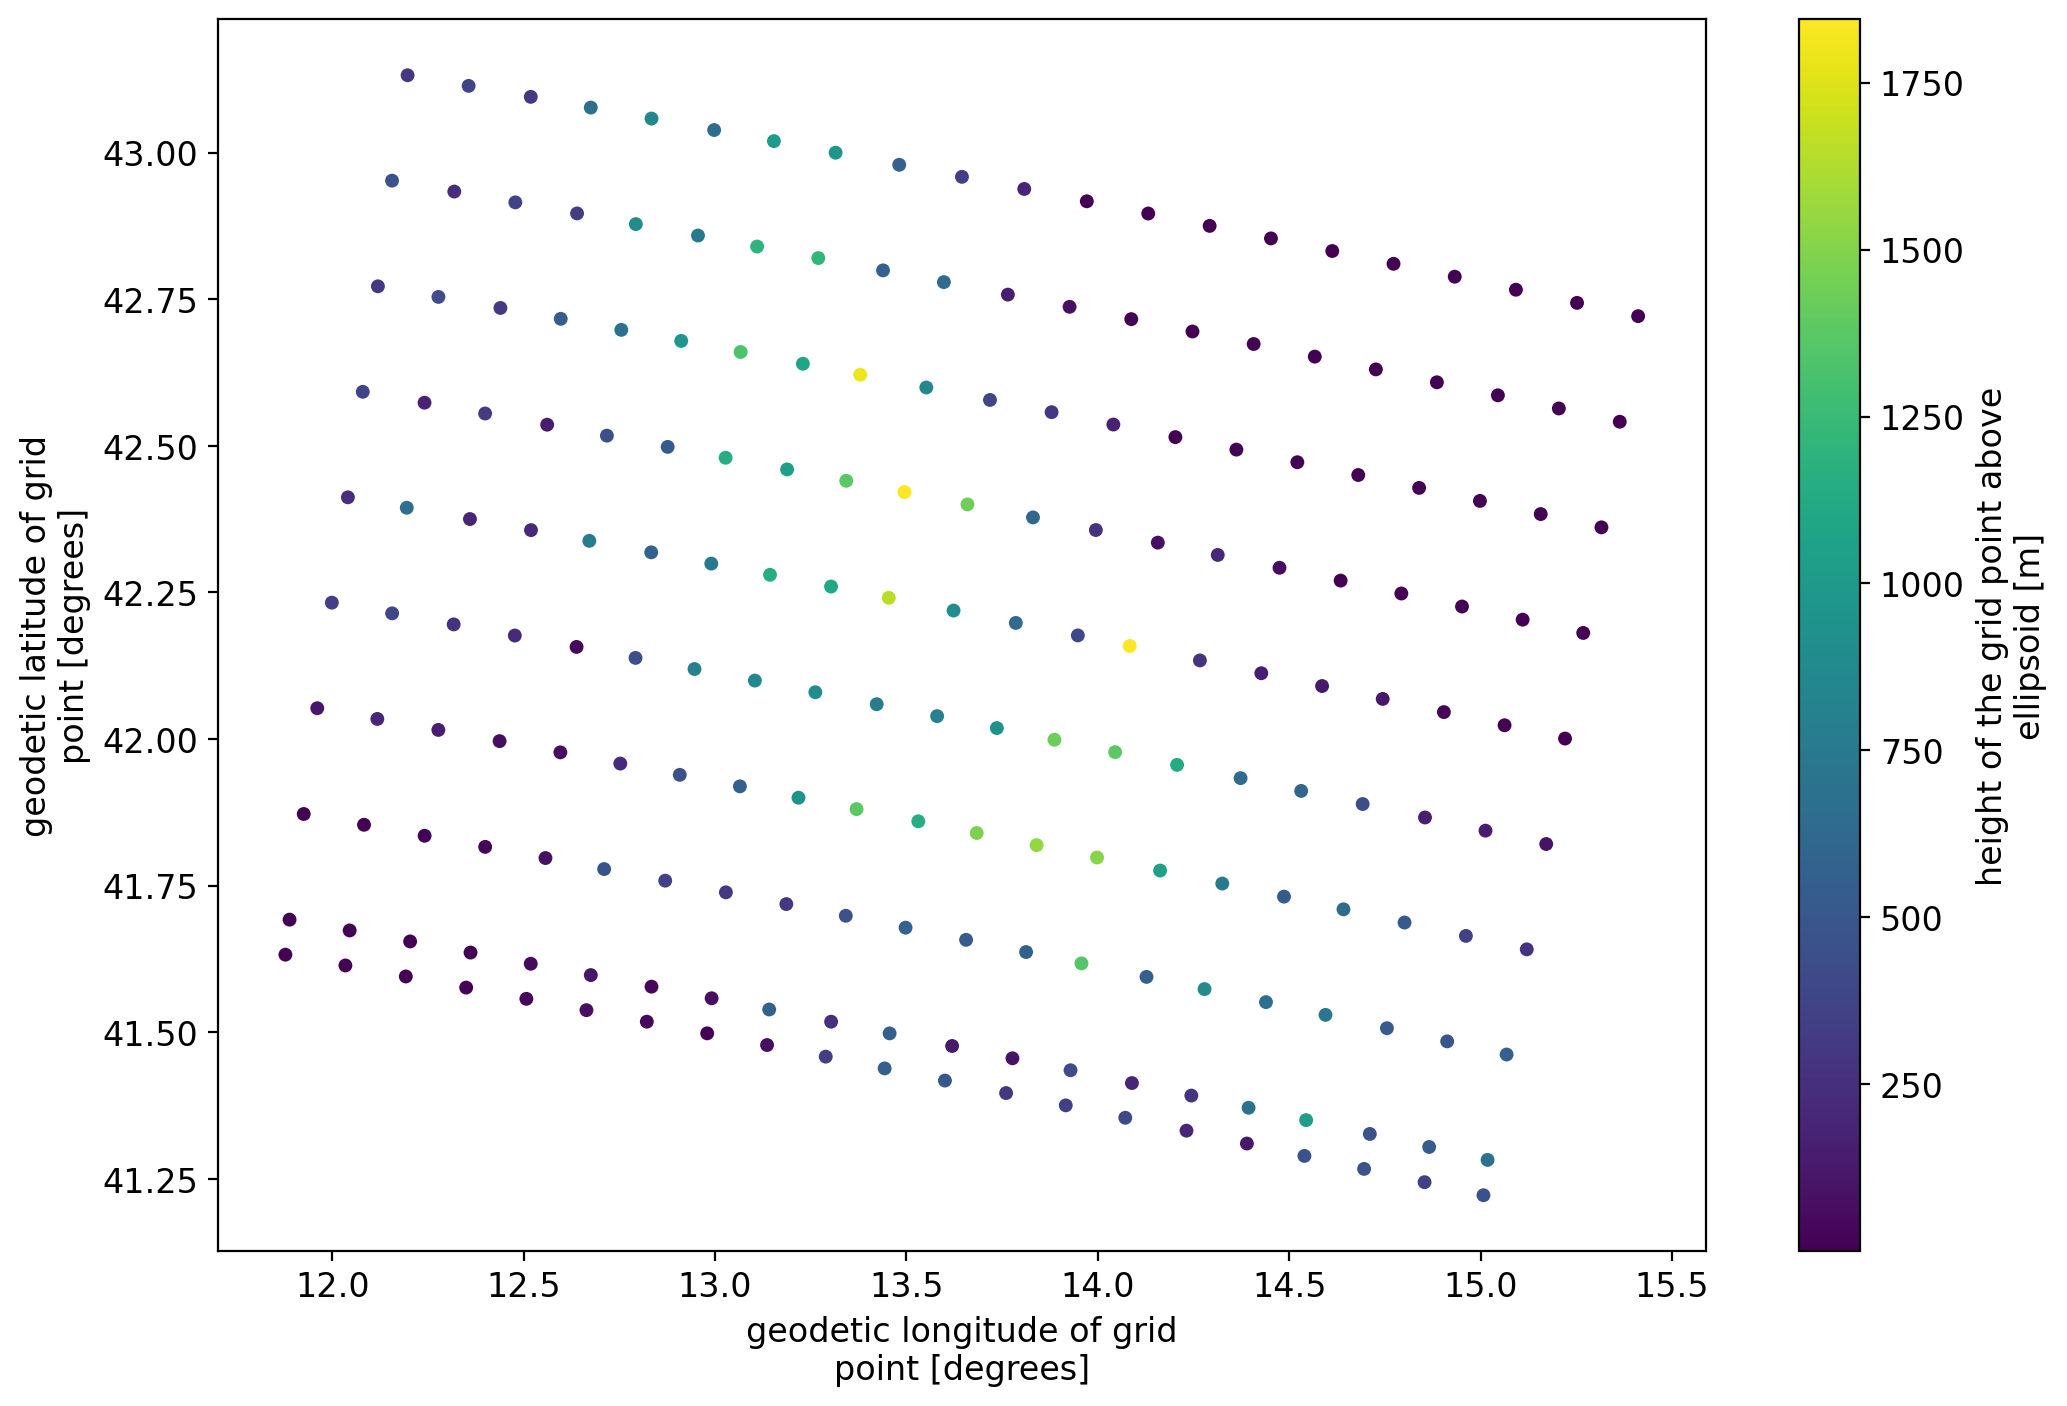

In [ ]:
_ = gcp.plot.scatter(x="longitude", y="latitude", hue="height")

In [ ]:
orbit = xr.open_dataset(
    product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/orbit"
)
orbit

In [ ]:
orbit = dt ["S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/orbit"].to_dataset()
orbit

<xarray.Dataset> Size: 896B
Dimensions:       (azimuth_time: 16, axis: 3)
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 128B 2025-06-29T05:09:49.7070...
Dimensions without coordinates: axis
Data variables:
    position      (azimuth_time, axis) float64 384B dask.array<chunksize=(16, 3), meta=np.ndarray>
    velocity      (azimuth_time, axis) float64 384B dask.array<chunksize=(16, 3), meta=np.ndarray>

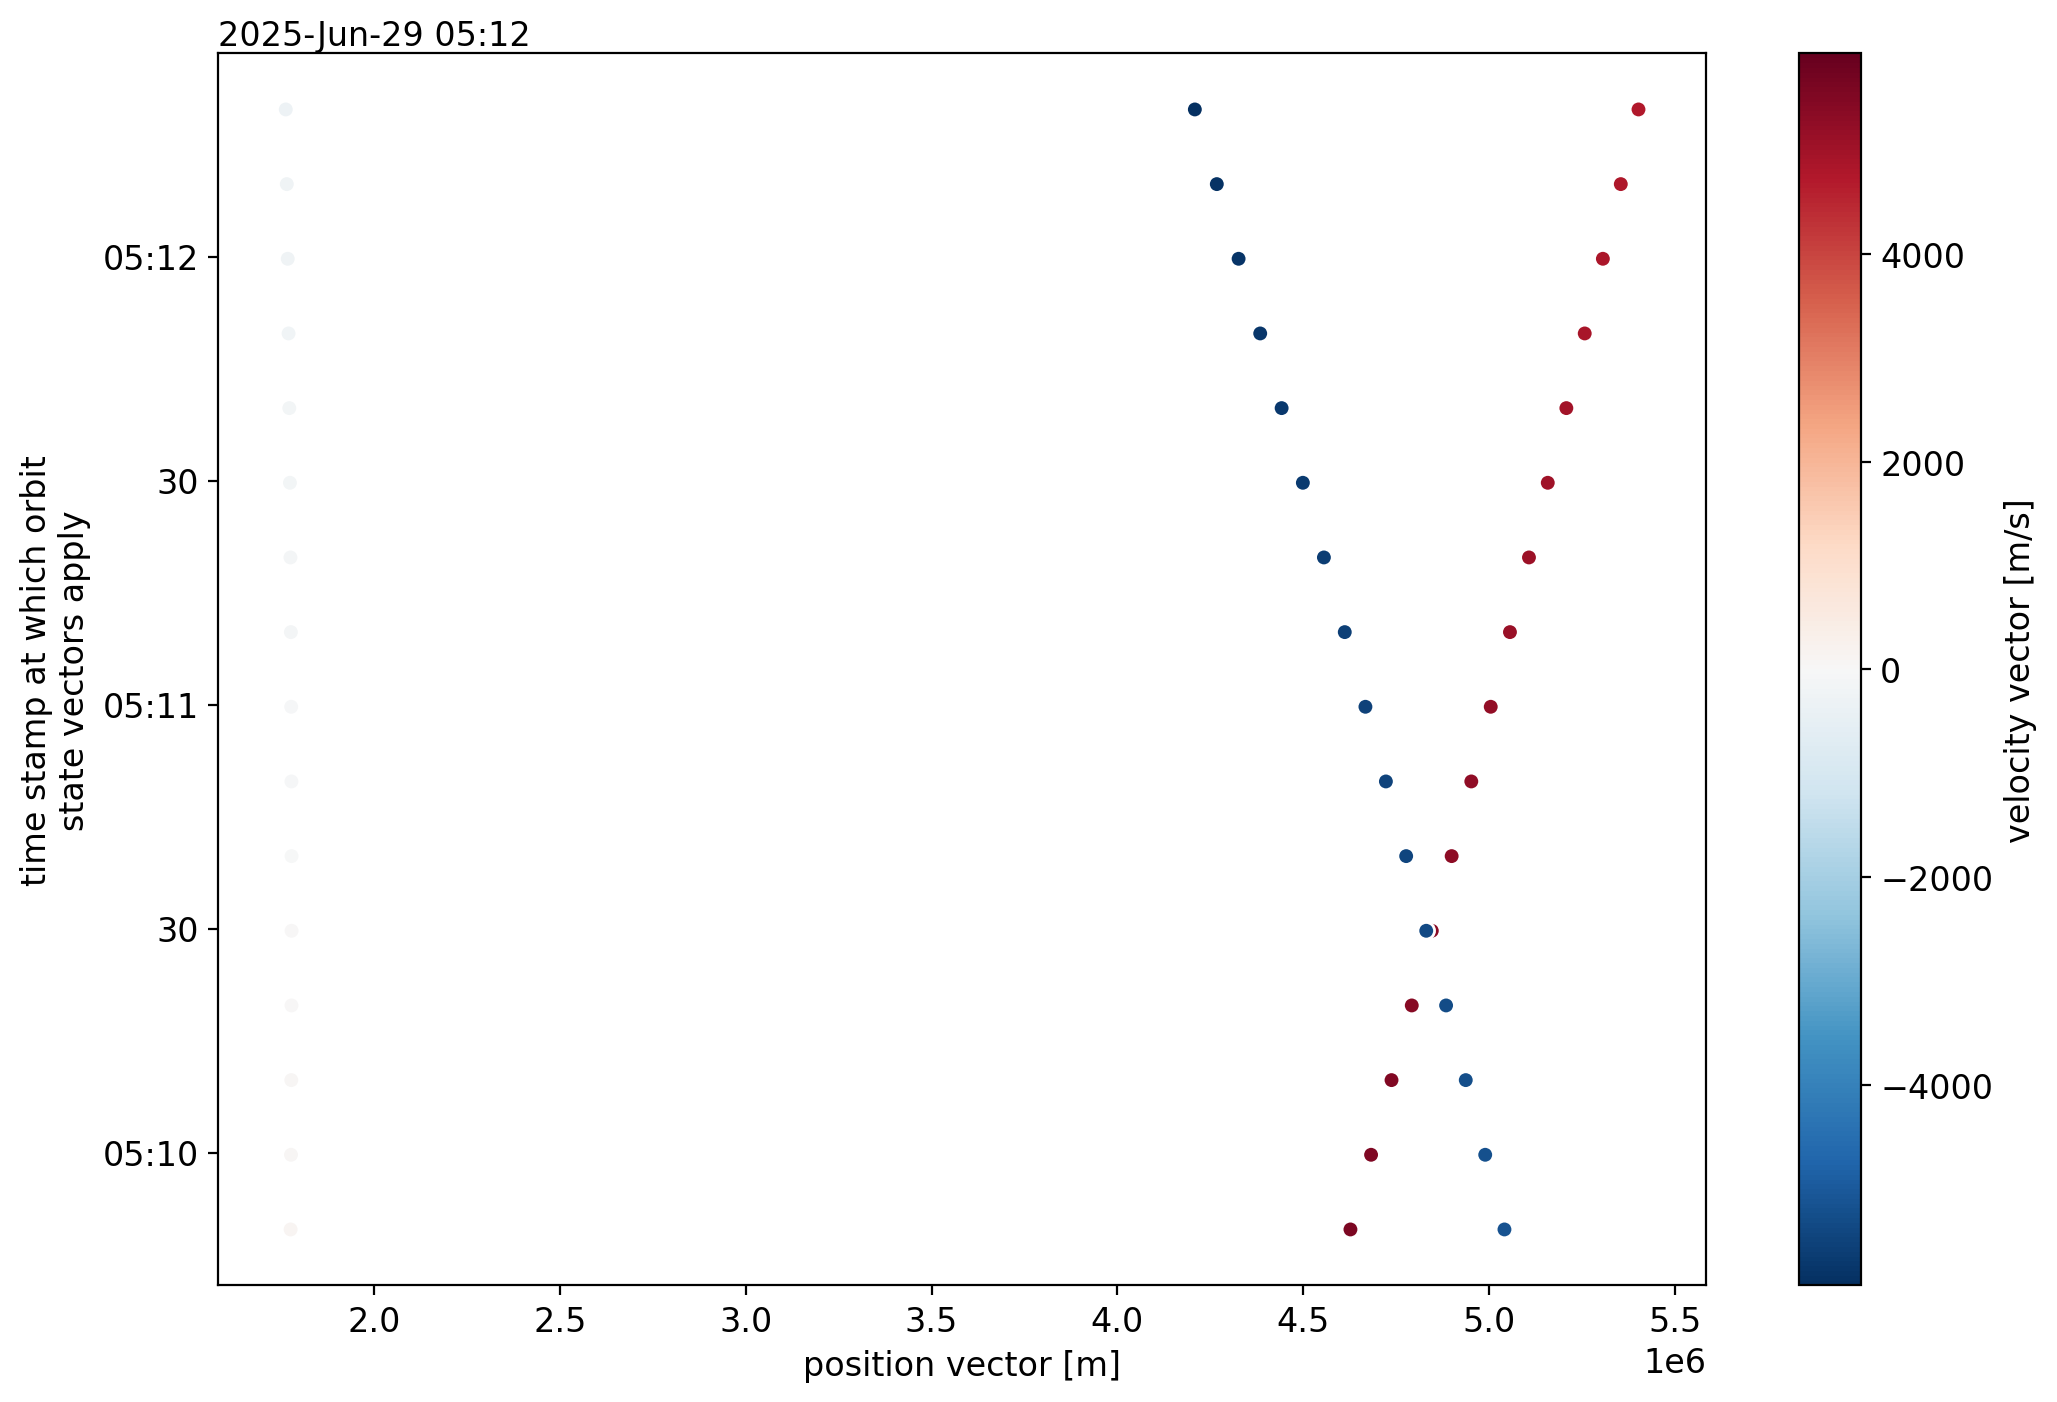

In [ ]:
orbit.plot.scatter(y="azimuth_time", x="position", hue="velocity")

In [ ]:
calibration = xr.open_dataset(
    product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/calibration"
)
calibration

In [ ]:
calibration = dt["S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/quality/calibration"].to_dataset()
calibration

<xarray.Dataset> Size: 296kB
Dimensions:       (azimuth_time: 27, ground_range: 667)
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 216B 2025-06-29T05:10:50.9484...
  * ground_range  (ground_range) float64 5kB 0.0 6.671e+06 ... 4.438e+09
    line          (azimuth_time) uint32 108B dask.array<chunksize=(27,), meta=np.ndarray>
    pixel         (ground_range) uint32 3kB dask.array<chunksize=(667,), meta=np.ndarray>
Data variables:
    beta_nought   (azimuth_time, ground_range) float32 72kB dask.array<chunksize=(27, 667), meta=np.ndarray>
    dn            (azimuth_time, ground_range) float32 72kB dask.array<chunksize=(27, 667), meta=np.ndarray>
    gamma         (azimuth_time, ground_range) float32 72kB dask.array<chunksize=(27, 667), meta=np.ndarray>
    sigma_nought  (azimuth_time, ground_range) float32 72kB dask.array<chunksize=(27, 667), meta=np.ndarray>

In [ ]:
# betaNought and dn calibration are typically constat
test = calibration.beta_nought.mean().as_numpy().item()
test
print(calibration.beta_nought.mean().as_numpy().item(), "+-", calibration.beta_nought.std().as_numpy().item())
print(calibration.dn.mean().as_numpy().item(), "+-", calibration.dn.std().as_numpy().item())

449.5509948730469 +- 1.0470260349393357e-05
474.0 +- 0.0


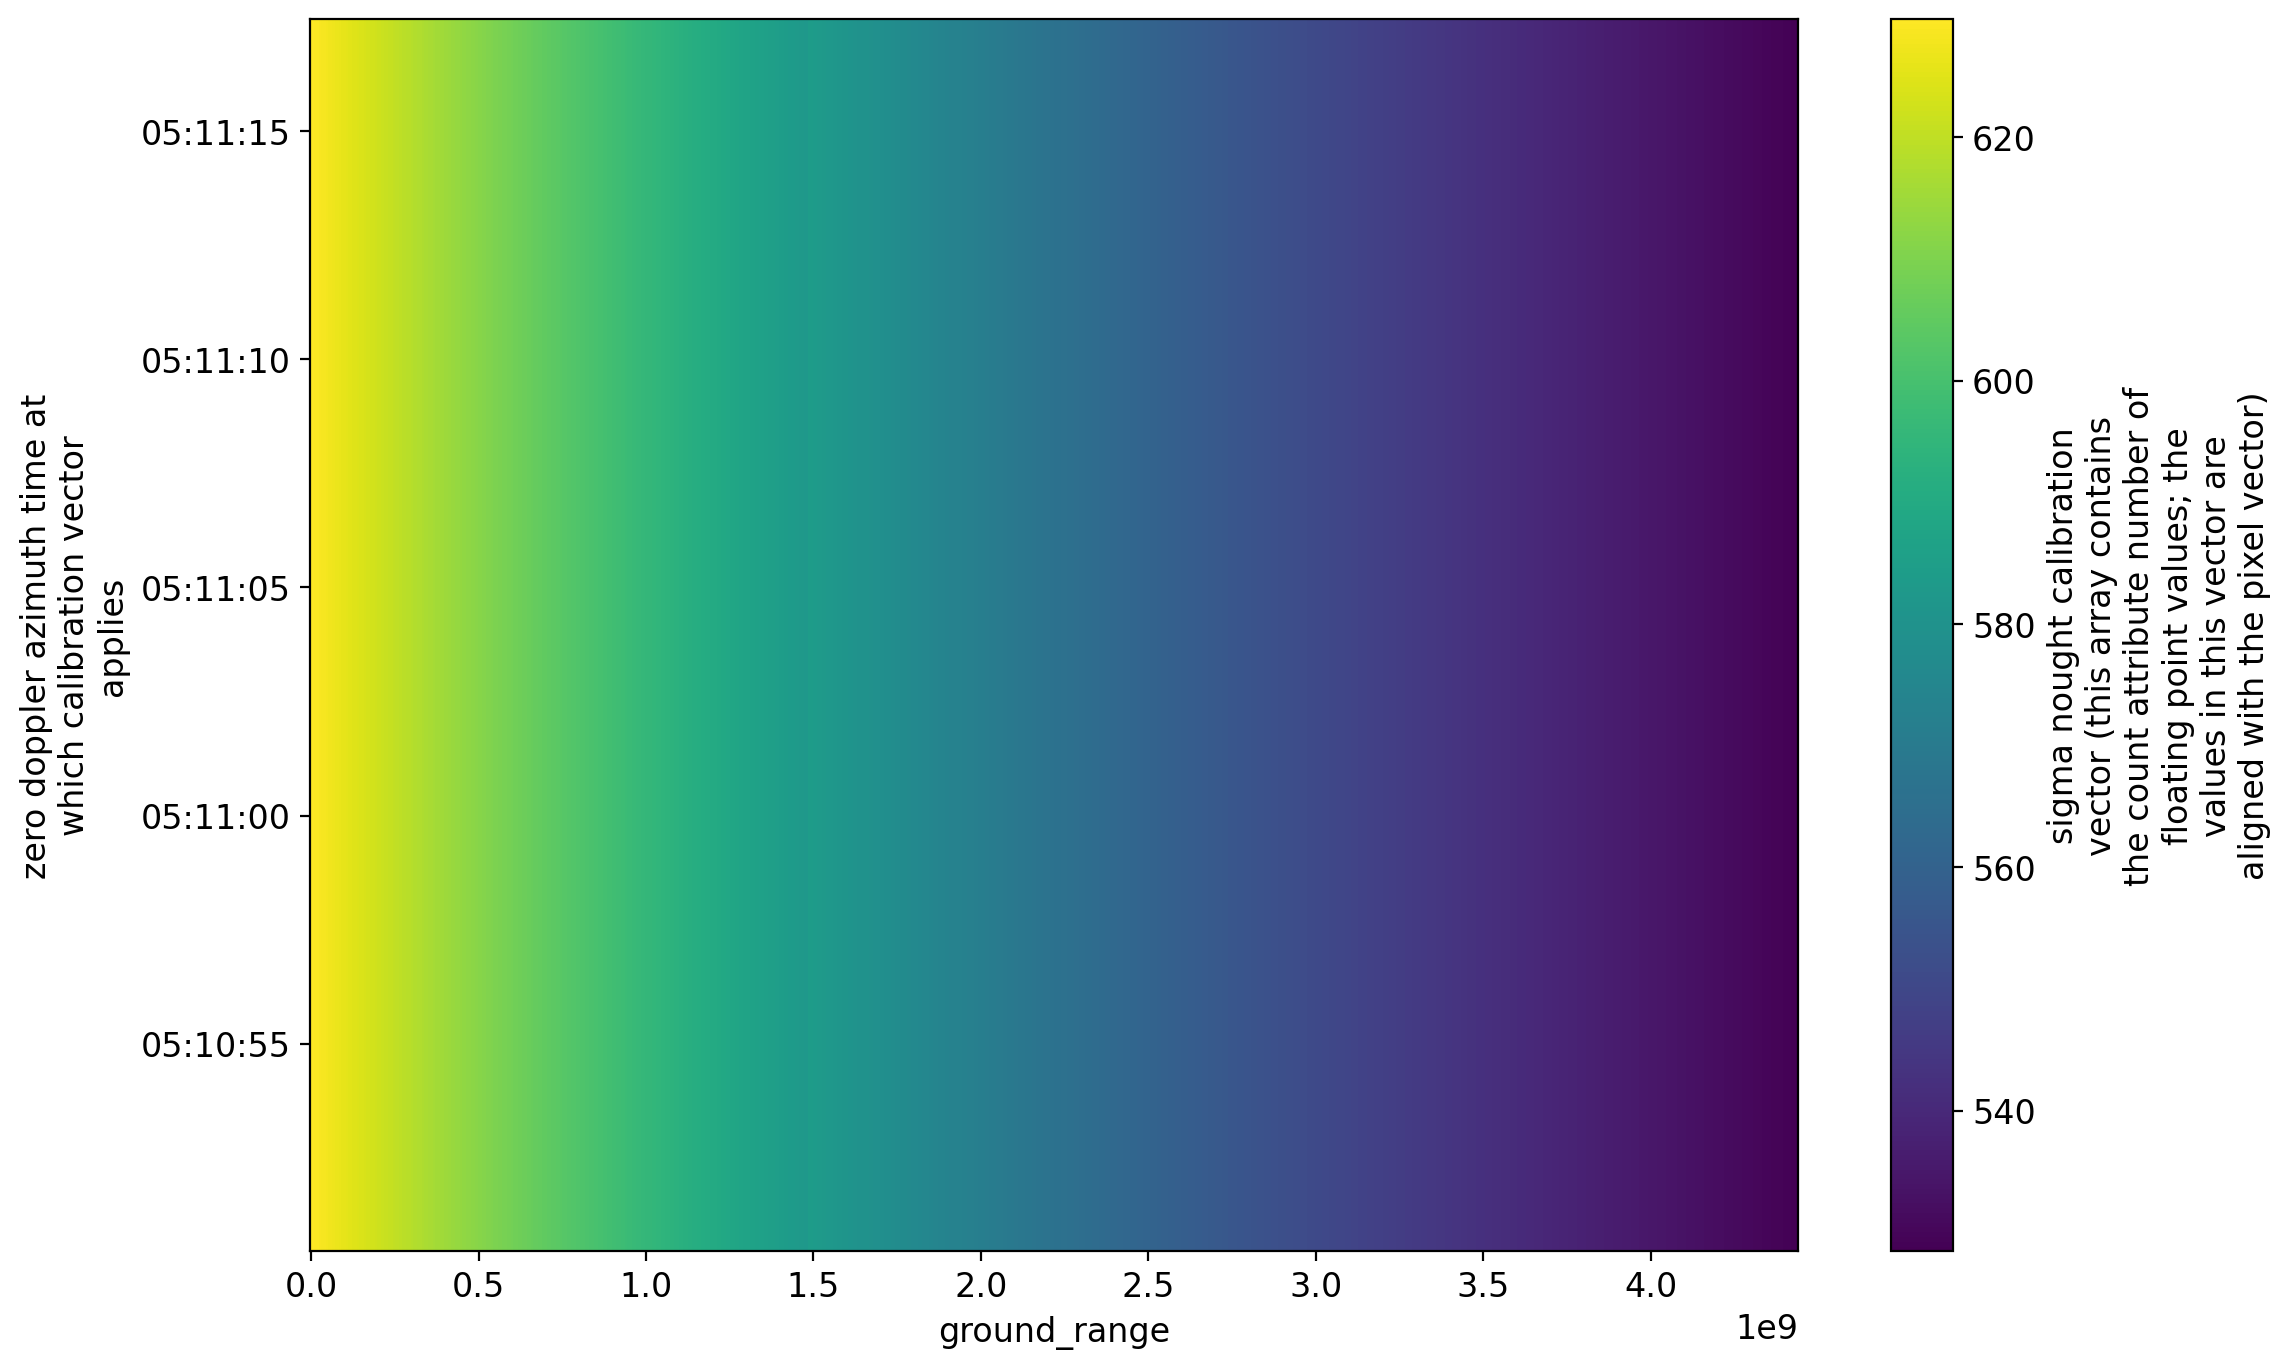

In [ ]:
_ = calibration.sigma_nought.plot(x="ground_range")

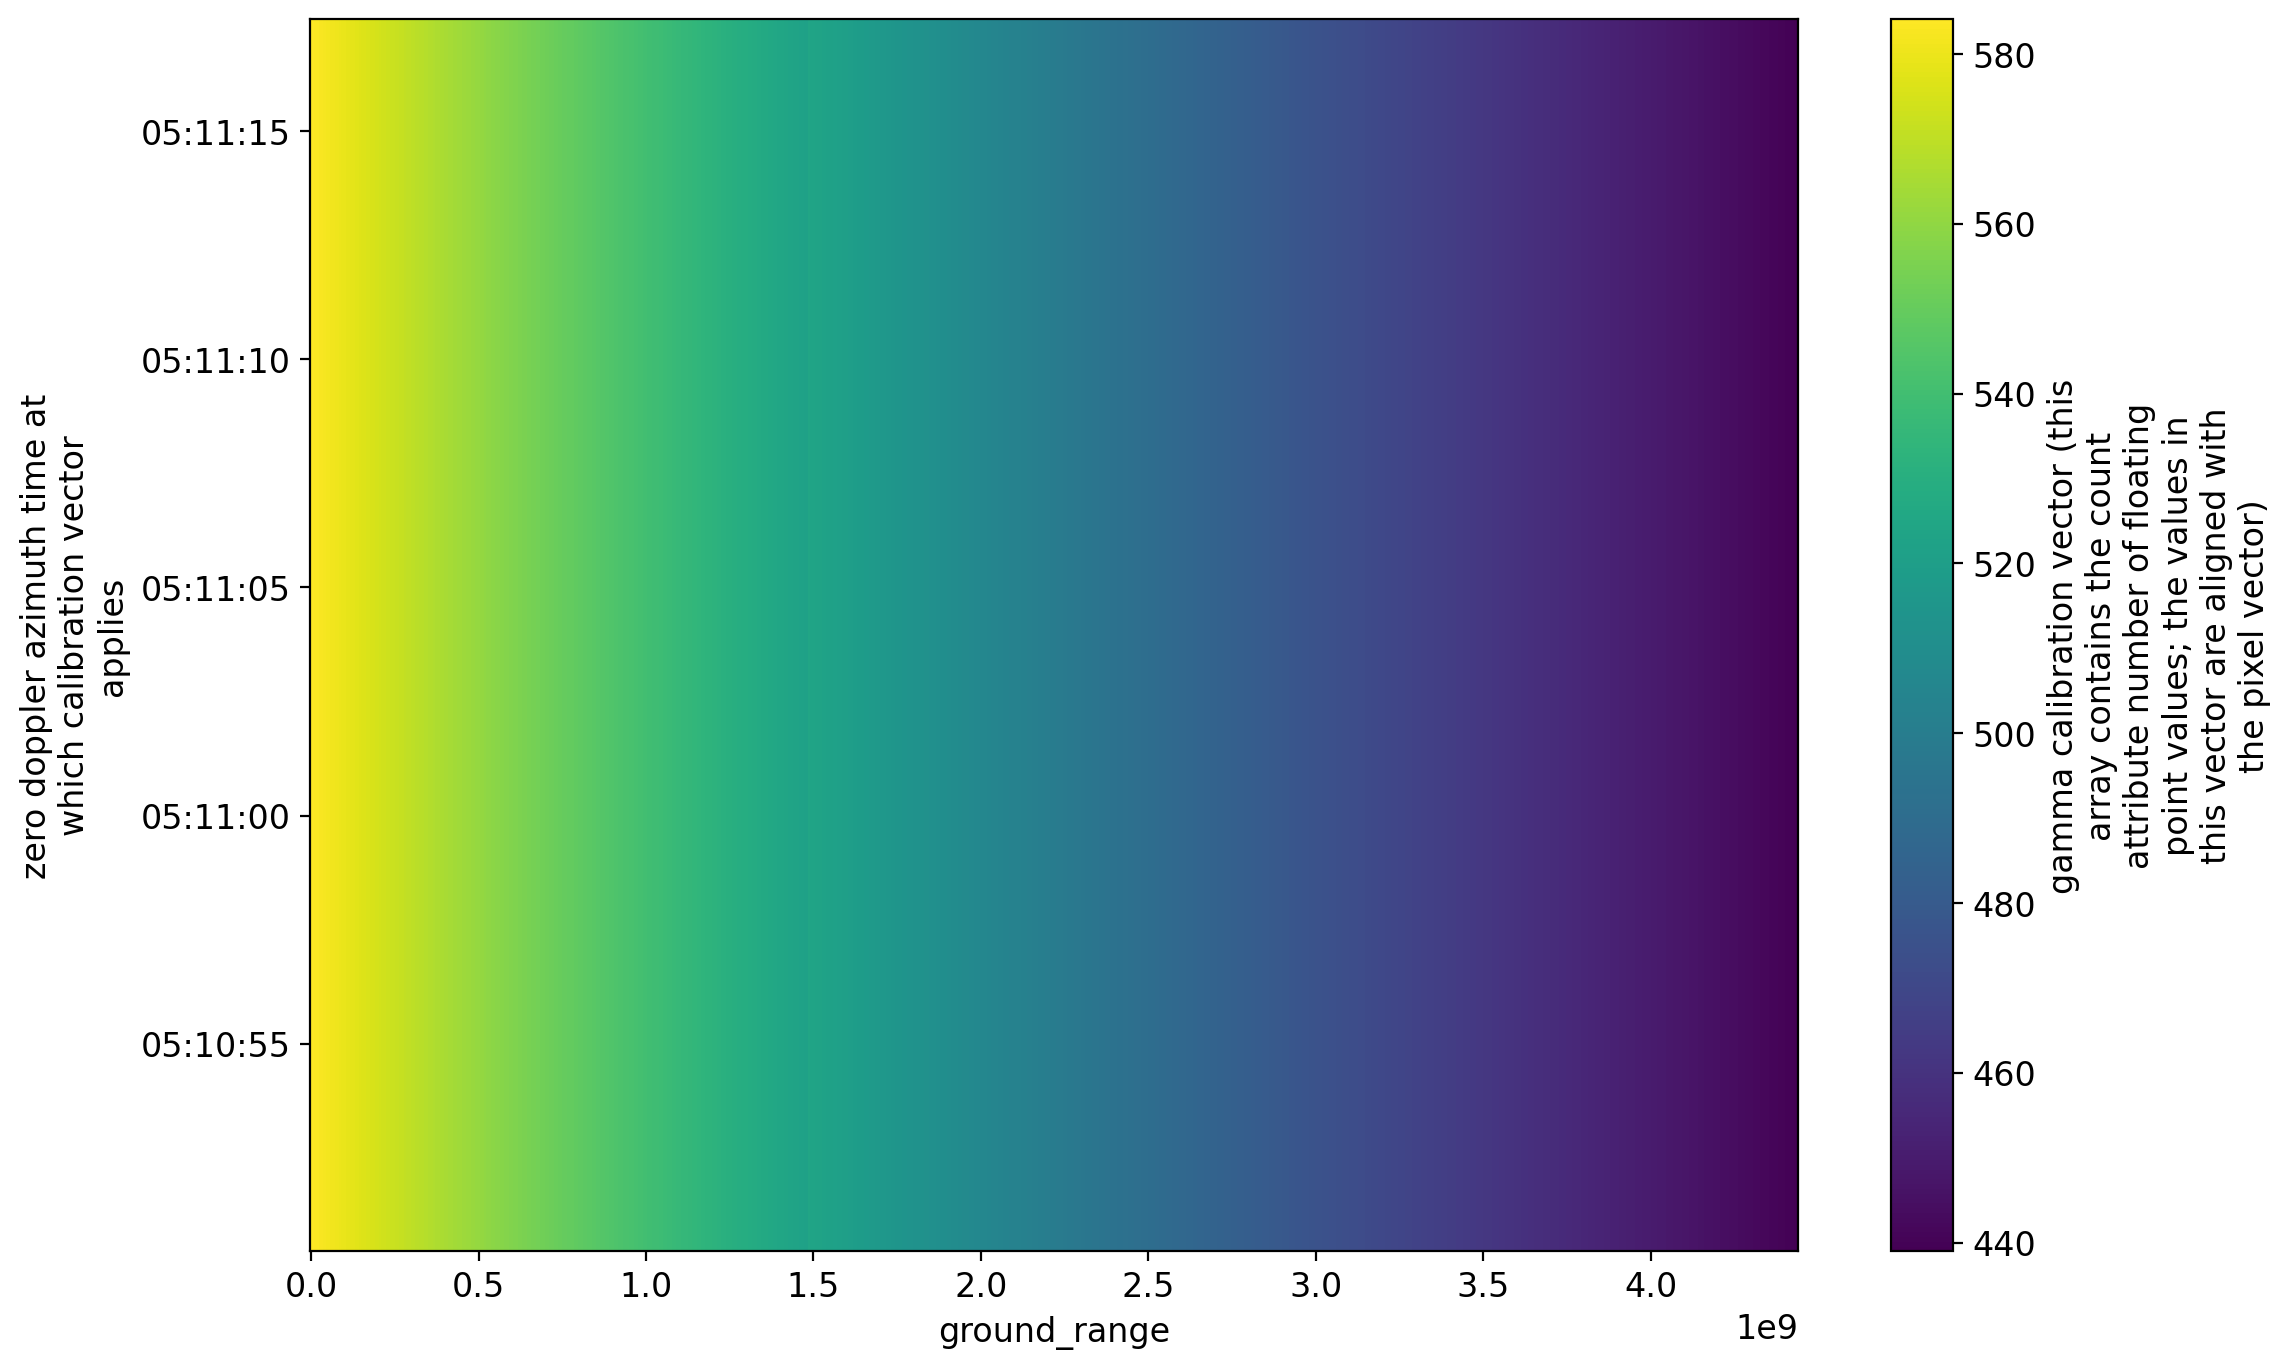

In [ ]:
_ = calibration.gamma.plot(x="ground_range")

In [ ]:
betaNought_block = xarray_sentinel.calibrate_amplitude(
    measurement_block, calibration.beta_nought
)
betaNought_block

<xarray.Dataset> Size: 2GB
Dimensions:       (azimuth_time: 16679, ground_range: 26612)
Coordinates:
  * azimuth_time  (azimuth_time) uint16 33kB 52568 44137 35707 ... 35334 26904
Dimensions without coordinates: ground_range
Data variables:
    grd           (azimuth_time, ground_range) float32 2GB dask.array<chunksize=(2048, 2048), meta=np.ndarray>
Attributes:
    long_name:  amplitude for beta nought calibration vector (this array cont...

KeyboardInterrupt: 

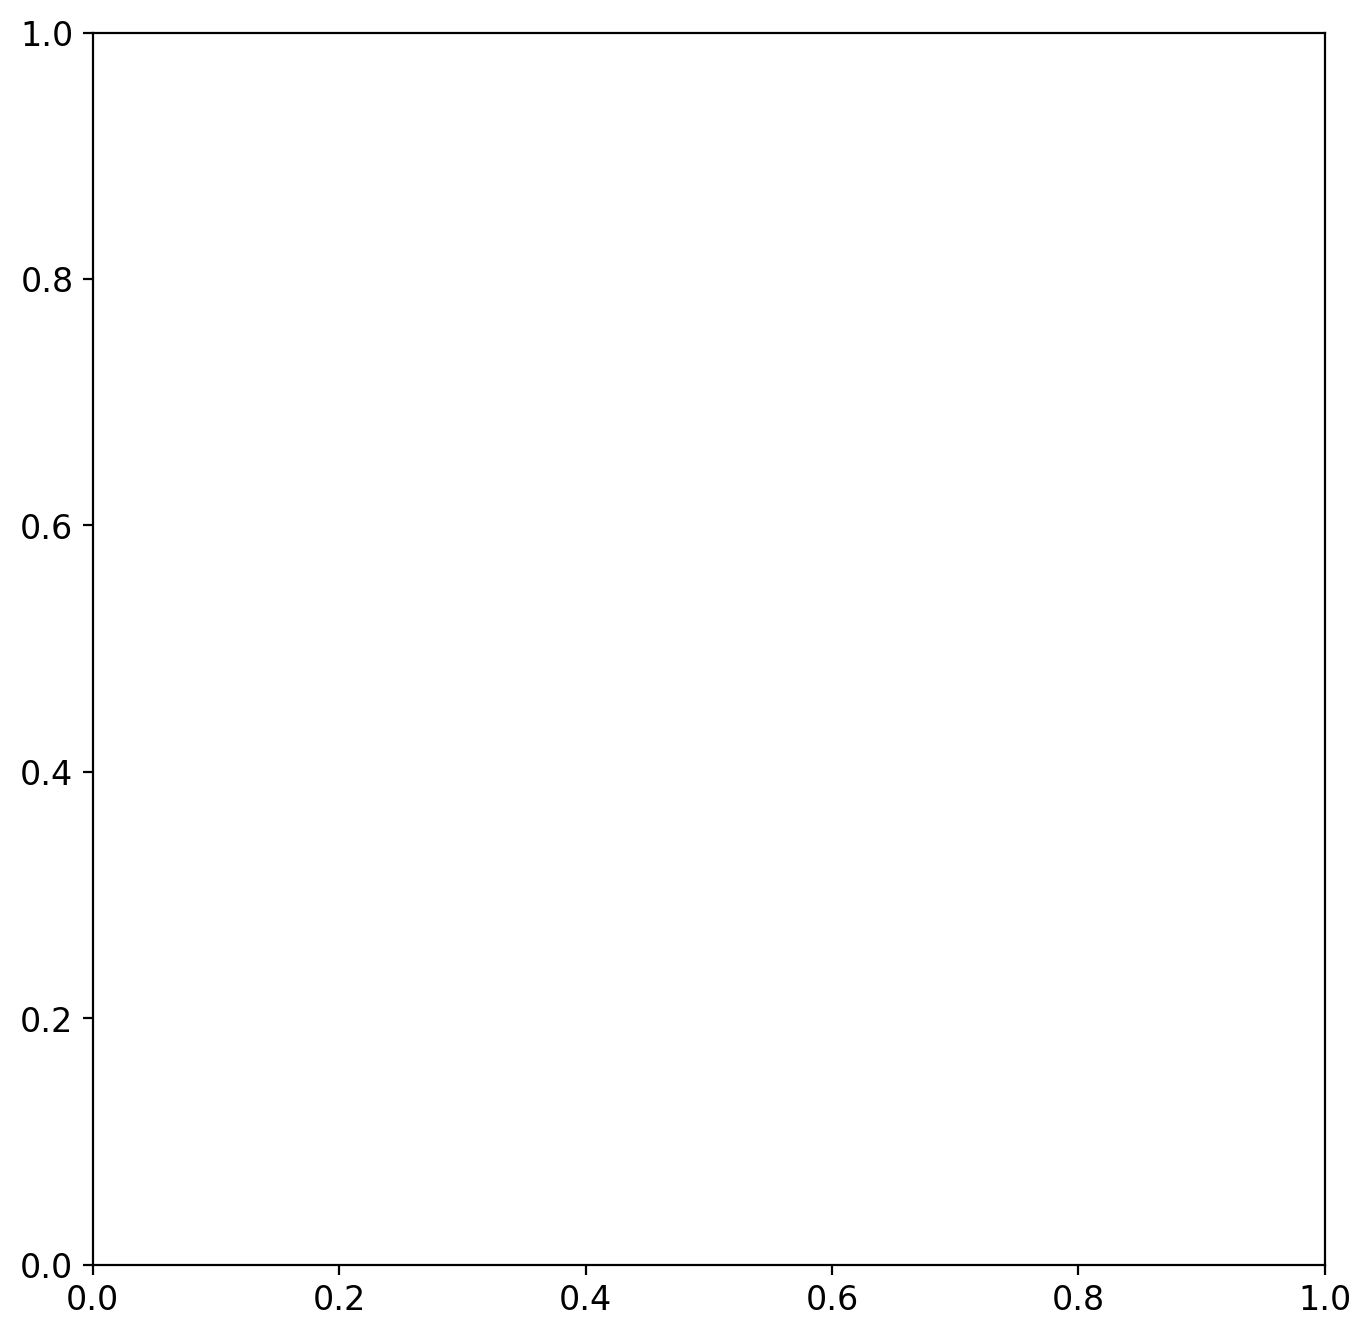

In [ ]:
bn = abs(betaNought_block).to_dataarray()
# bn.plot()
plt.imshow(bn, vmin=0, vmax=200)
plt.xlim(0, bn.shape[1])  
plt.ylim(0, bn.shape[0])
plt.show

In [ ]:
betaNought_block_db = xarray_sentinel.calibrate_intensity(
    measurement_block, calibration.beta_nought, as_db=True
)
betaNought_block_db

<xarray.Dataset> Size: 2GB
Dimensions:       (azimuth_time: 16679, ground_range: 26612)
Coordinates:
  * azimuth_time  (azimuth_time) uint16 33kB 52568 44137 35707 ... 35334 26904
Dimensions without coordinates: ground_range
Data variables:
    grd           (azimuth_time, ground_range) float32 2GB dask.array<chunksize=(2048, 2048), meta=np.ndarray>
Attributes:
    long_name:  beta nought calibration vector (this array contains the count...
    units:      dB

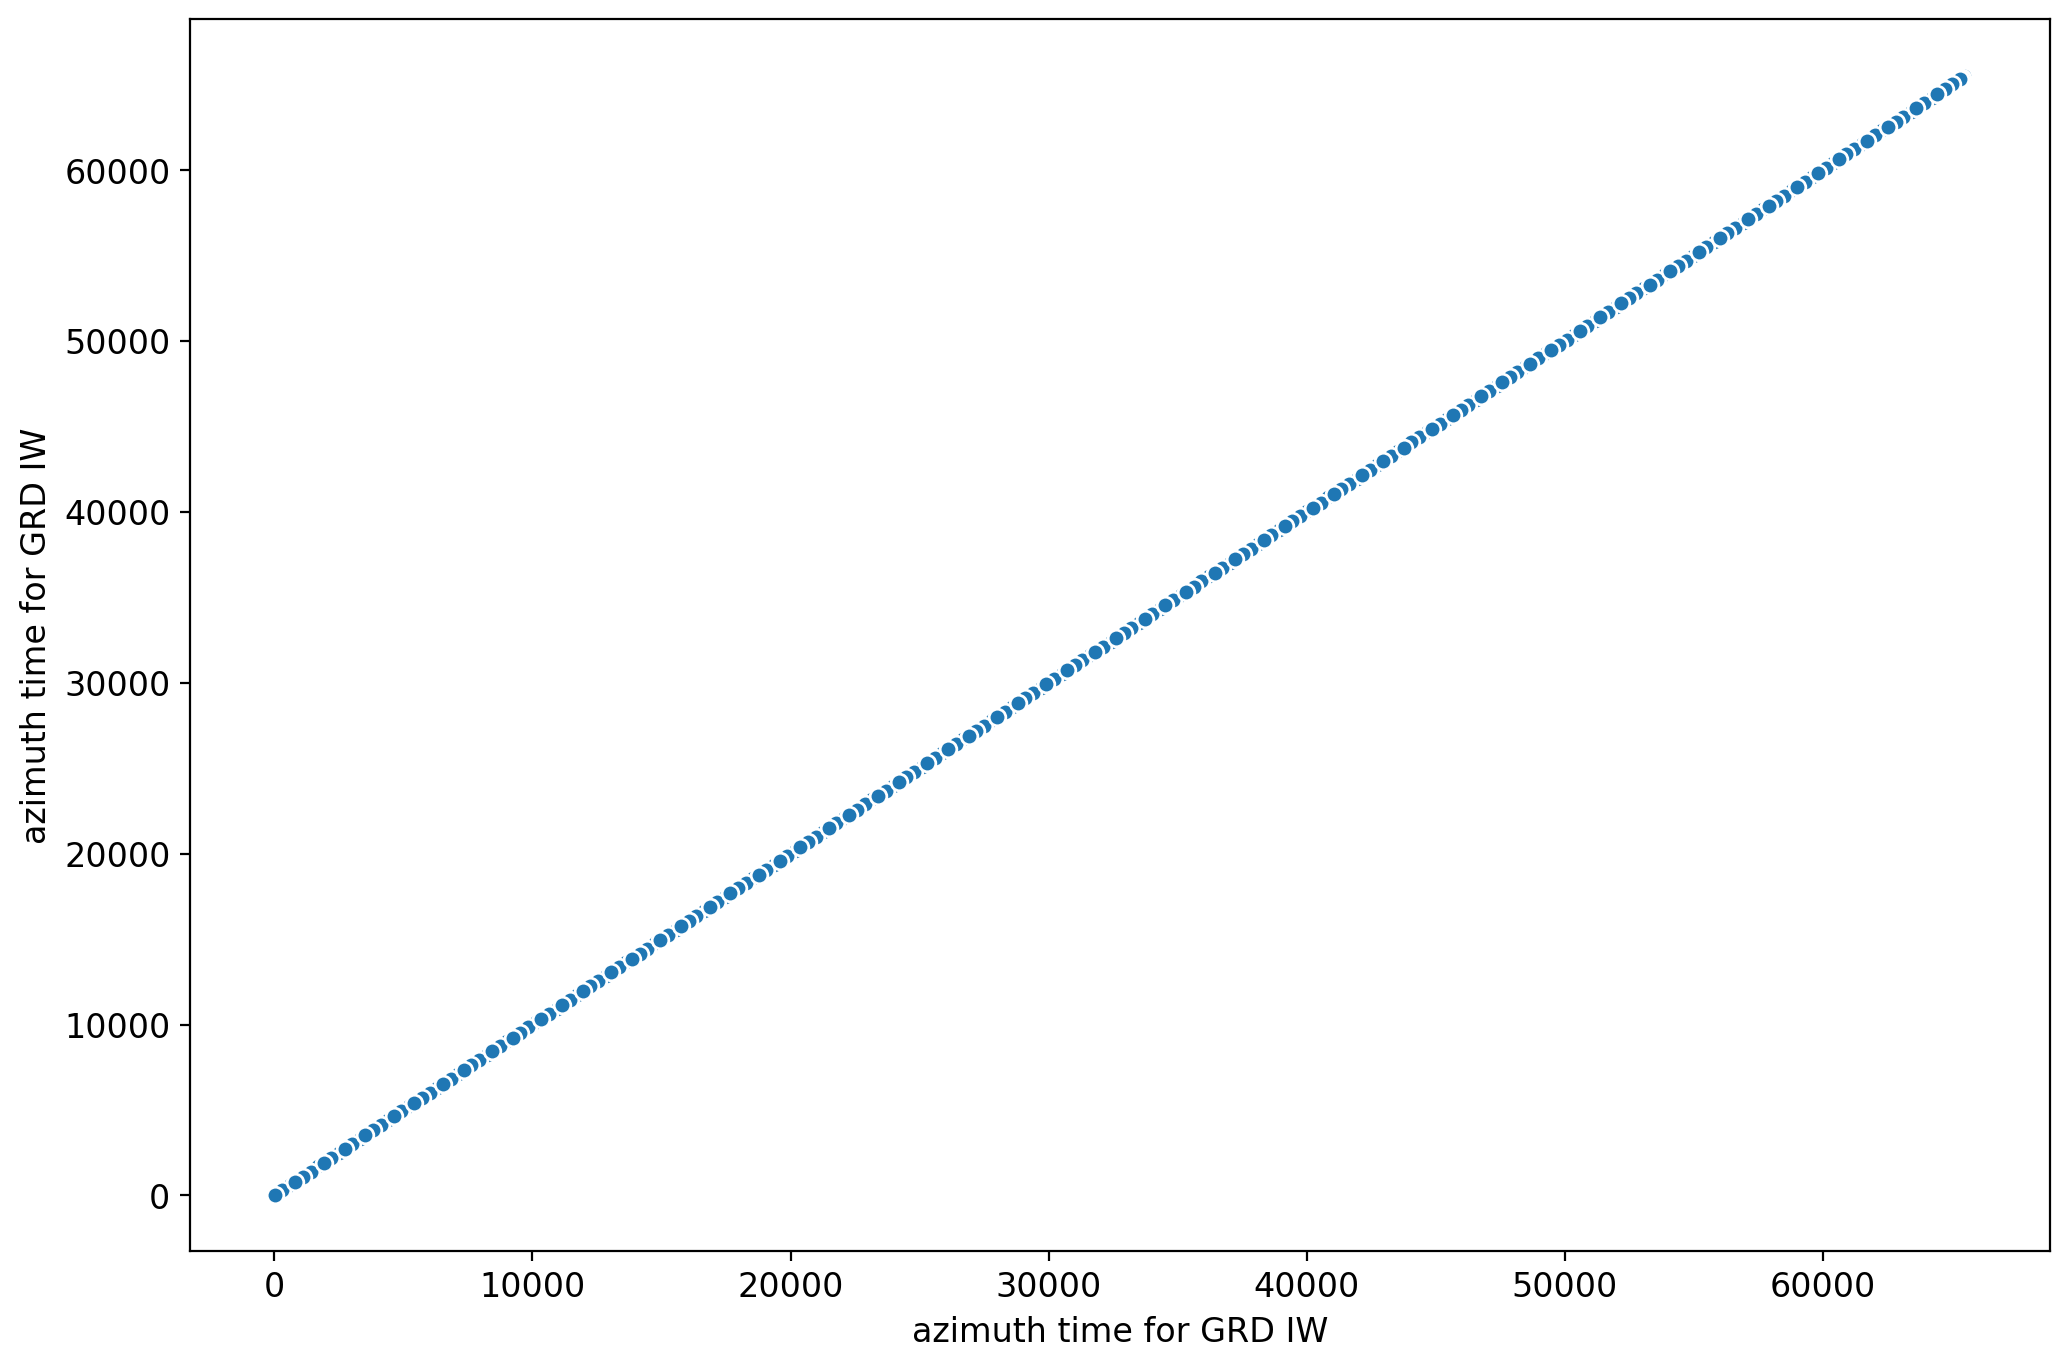

In [ ]:
_ = betaNought_block_db.plot.scatter(y="azimuth_time", vmin=-20, vmax=5)

In [ ]:
noise_range = xr.open_dataset(
    product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/noise_range"
)
noise_range

In [ ]:
_ = noise_range.noiseRangeLut.plot(x="pixel")

In [ ]:
noise_azimuth = xr.open_dataset(
    product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/noise_azimuth"
)
noise_azimuth

In [ ]:
_ = noise_azimuth.plot.scatter(x="line", y="noiseAzimuthLut")

In [ ]:
coordinate_conversion = xr.open_dataset(
    product_path,
    engine="sentinel-1",
    group=f"{swath_polarisation_group}/coordinate_conversion",
)
coordinate_conversion

In [ ]:
xr.open_dataset(
    product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/attitude"
)

In [ ]:
xr.open_dataset(
    product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/dc_estimate"
)

In [ ]:
xr.open_dataset(
    product_path,
    engine="sentinel-1",
    group=f"{swath_polarisation_group}/azimuth_fm_rate",
)